In [1]:
%load_ext autoreload
%autoreload 2

import os, pickle, random, sbmtm
# import seaborn as sns; sns.set(style="white", color_codes=True) # is not installed on system, just folder in this directory
import numpy as np
import pandas as pd
from sbmtm import sbmtm
import matplotlib.pyplot as plt
from matplotlib import cm


%matplotlib inline

In [2]:
path_read = 'cleaned_posts/'
fname_read = '10149142-the-family-fang.json'
filename = os.path.join(path_read,fname_read)
print(filename)

cleaned_posts/10149142-the-family-fang.json


In [3]:
with open(filename,"r",encoding="utf8") as f:
    df = pd.DataFrame(pd.read_json(f)).T

In [4]:
df.head()

,delta,likes,name,raw_text,text,word_count
1,-338,0,ehicifj.json,i had so much fun reading this book i actuall...,"[fun, read, book, actually, finish, book, disn...",54
2,152,0,acfajgi.json,i avoided this book for the longest time beca...,"[avoid, book, long, time, book, description, p...",41
3,444,0,fdccaeb.json,a rare contemporary novel that understands tha...,"[rare, contemporary, novel, understand, call, ...",41
4,-195,1 like,ecaaeab.json,what an a a mazing debut compelling and one o...,"[debut, compelling, kind, story, pair, perform...",60
5,-303,0,hebfff.json,this absolutely lives up to the hype great cha...,"[absolutely, live, hype, great, character, fla...",35


In [5]:
# minimum text length
m_min = 100 ## minimum text length
df = df[df['word_count']>=m_min]
list_texts = list(df['text'])
list_titles = list(df.index)
len(list_texts)

# list_m = [len(text) for text in list_texts]
# N = len(list_texts)
# x = np.sort(list_m)
# y = (np.arange(N)+1)

# plt.plot(x,N-y)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('textlength, m')
# plt.ylabel('# books lenth >= m')

234

In [6]:
## fitting
model = sbmtm()
model.make_graph(list_texts,documents = list_titles)
model.fit(n_init=5)

In [16]:
## select uppermost level in the hierarchy
L=model.L
l = L-2
print(l)

1


In [17]:
## the topics
model.topics(l=l)

{0: [('art', 0.01695891989791718),
  ('fang', 0.01654729562855026),
  ('parent', 0.016300321066930107),
  ('child', 0.0158063719436898),
  ('buster', 0.015312422820449494),
  ('family', 0.015230097966576109),
  ('annie', 0.014983123404955957),
  ('performance', 0.013583600889108422),
  ('caleb', 0.012513377788754425),
  ('camille', 0.012184078373260887)],
 1: [('book', 0.021671826625386997),
  ('not', 0.01813356921716055),
  ('read', 0.016364440513047324),
  ('like', 0.01592215833701902),
  ('story', 0.014816452896948253),
  ('find', 0.013710747456877488),
  ('think', 0.013157894736842105),
  ('love', 0.012936753648827952),
  ('character', 0.0127156125608138),
  ('time', 0.011941618752764263)],
 2: [('film', 0.037095501183898975),
  ('hilarious', 0.0244672454617206),
  ('wes', 0.01973164956590371),
  ('emotionally', 0.018942383583267563),
  ('anderson', 0.018153117600631413),
  ('truly', 0.018153117600631413),
  ('emotion', 0.01499605367008682),
  ('matter', 0.01499605367008682),
  ('w

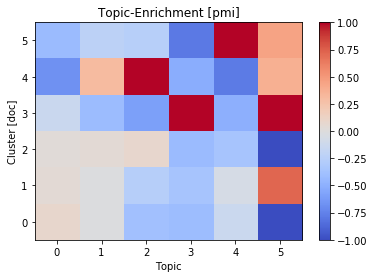

In [18]:
## topic enrichment as pointwise mutual information
pmi_td_tw = model.pmi_td_tw(l=l)
cmap=cm.get_cmap('coolwarm')
plt.imshow(pmi_td_tw,origin='lower',aspect='auto',vmin=-1,vmax=1,cmap=cmap)
plt.ylabel('Cluster [doc]')
plt.xlabel('Topic')
plt.title('Topic-Enrichment [pmi]')
plt.colorbar()

In [20]:
## informativeness of each topic (higher == more informative)
p_td_tw = model.group_to_group_mixture(l=l)
p_tw_td = p_td_tw.T
p_td = np.sum(p_tw_td,axis=0)
p_tw = np.sum(p_tw_td,axis=1)
p_td_given_tw = (p_tw_td/np.sum(p_tw_td,axis=1 )[:,np.newaxis]).T

H_tw = -np.nansum(p_td_given_tw*np.log(p_td_given_tw),axis=0)
H_tw_rand = -np.nansum(p_td*np.log(p_td))
I_tw = H_tw_rand-H_tw
# ind_sort_tw = np.argsort(I_tw)[::-1]
# print(I_tw[ind_sort_tw])
print(I_tw)

[ 0.10614482  0.0126535  -0.05877142  0.01749866 -0.04683904  0.27565849]
